In [232]:
import sklearn
import numpy as py
import pandas as pd
from sklearn import tree
from sklearn import datasets
from sklearn import model_selection

In [233]:
# load datasets
data = datasets.load_wine()
X, y, features, classes = data.data, data.target, data.feature_names, data.target_names
print(f'X.shape {X.shape}')
print(f'y.shape {y.shape}')
print(f'feature names : {features}')
print(f'classes : {classes}')

X.shape (178, 13)
y.shape (178,)
feature names : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
classes : ['class_0' 'class_1' 'class_2']


In [234]:
pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [235]:
# split dataset into train dataset and test dataset
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
print(train_X.shape, train_y.shape)
print(test_X.shape)
print(len(train_X) + len(test_X))

(119, 13) (119,)
(59, 13)
178


0.9915966386554622
0.9661016949152542


[Text(0.5, 0.875, 'x[9] <= 3.82\ngini = 0.66\nsamples = 119\nvalue = [39, 47, 33]\nclass = class_1'),
 Text(0.3, 0.625, 'x[12] <= 1010.0\ngini = 0.089\nsamples = 43\nvalue = [2, 41, 0]\nclass = class_1'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'x[2] <= 3.07\ngini = 0.046\nsamples = 42\nvalue = [1, 41, 0]\nclass = class_1'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = class_1'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = class_0'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = class_0'),
 Text(0.7, 0.625, 'x[6] <= 1.4\ngini = 0.568\nsamples = 76\nvalue = [37, 6, 33]\nclass = class_0'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = class_2'),
 Text(0.8, 0.375, 'x[12] <= 724.5\ngini = 0.24\nsamples = 43\nvalue = [37, 6, 0]\nclass = class_0'),
 Text(0.7, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6, 0]\nclass = class_1'),
 Text(0.9, 0.125, 'gi

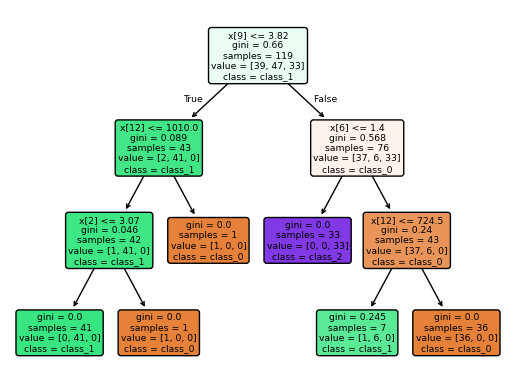

In [250]:
clf = tree.DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=3,
    random_state=42
)
clf = clf.fit(train_X, train_y)
score = clf.score(test_X, test_y)
print(clf.score(train_X, train_y))
print(score)
tree.plot_tree(clf, filled=True, rounded=True, class_names=classes)

In [251]:
sorted([*zip(features, clf.feature_importances_)], key=lambda f:f[1])

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('ash', 0.025424965346173476),
 ('proline', 0.13638337905772135),
 ('color_intensity', 0.4102887373880654),
 ('flavanoids', 0.42790291820803966)]